# Task 4: Data Cleaning and Insight Generation from Survey Data

## Step 1: Setup & Load the Dataset

In [2]:
import pandas as pd

df = pd.read_csv('kaggle_survey_2017_2021.csv', low_memory=False)

In [3]:
# Preview the first 5 rows
print(df.head())

      - Time from Start to Finish (seconds)                           Q1  \
0  Year               Duration (in seconds)  What is your age (# years)?   
1  2021                                 910                        50-54   
2  2021                                 784                        50-54   
3  2021                                 924                        22-24   
4  2021                                 575                        45-49   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                      India   
2                                  Indonesia   
3                                   Pakistan   
4                               

In [4]:
# Check shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (106302, 293)
Columns: ['-', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_12', 'Q9_OTHER', 'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_16', 'Q10_OTHER', 'Q11', 'Q12new', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_5', 'Q12_OTHER', 'Q13', 'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER', 'Q15', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q

In [5]:
# Check data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB
None


In [6]:
# Quick summary of missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_summary[missing_summary > 0])

Missing values:
 Q16_Part_17      106301
Q34_B_Part_16    106301
Q9_Part_12       106301
Q34_A_Part_16    106301
Q32_A_Part_20    106301
                  ...  
Q5                 7214
Q4                 2983
Q1                  445
Q3                  121
Q2                   95
Length: 292, dtype: int64


In [9]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include='number').columns.tolist()

print("Categorical columns:", categorical_cols[:10])  # Show first 10
print("Numerical columns:", numerical_cols)


Categorical columns: ['-', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2']
Numerical columns: []


### 🧾 Dataset Overview: Kaggle Data Science Survey (2021)

**General Info**
- **Rows**: 106,302
- **Columns**: 293
- **File Size**: ~237 MB
- **Data Types**: All columns are `object` (categorical or mixed text)
- **Time Column**: Includes `"Time from Start to Finish (seconds)"` as a string, not numeric

**Missing Data**
- **High Missingness**: Over 100 columns have >99% missing values (e.g., `Q16_Part_17`, `Q34_B_Part_16`)
- **Moderate Missingness**: Key demographic fields like `Q1` (Age), `Q2` (Gender), `Q3` (Country) have missing entries:
  - `Q1`: 445 missing
  - `Q2`: 95 missing
  - `Q3`: 121 missing
  - `Q4` (Education): 2,983 missing
  - `Q5` (Job Title): 7,214 missing

**Column Types**
- **Categorical Columns**: All columns are treated as object types, including multi-part questions (e.g., `Q7_Part_1`, `Q9_Part_12`)
- **Numerical Columns**: None detected; numeric responses may be stored as strings

**Common Issues**
- Inconsistent formatting across multi-part questions
- Sparse responses in later questions
- No standardized column naming (e.g., `Q1`, `Q2`, `Q3`, etc.)
- Potential need for manual mapping or label encoding


## 🧹 Step 2: Data Cleaning Workflow

### 2.1 Drop Ultra-Sparse Columns

In [ ]:
# Drop columns with more than 99% missing
threshold = 0.99
df_cleaned = df.loc[:, df.isnull().mean() < threshold]
print("Remaining columns:", df_cleaned.shape[1])

Remaining columns: 212


### 2.2 Remove Duplicates

In [11]:
# Drop exact duplicate rows
df_cleaned = df_cleaned.drop_duplicates()
print("Rows after dropping duplicates:", df_cleaned.shape[0])

Rows after dropping duplicates: 101846


### 2.3 Standardize Column Names

In [ ]:
# Clean column names: strip spaces, lowercase, replace special chars
df_cleaned.columns = (
    df_cleaned.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('[^a-z0-9_]', '', regex=True)
)

### 2.4 Convert Time Column

In [13]:
# Convert time column to numeric if present
if 'time_from_start_to_finish_seconds' in df_cleaned.columns:
    df_cleaned['time_from_start_to_finish_seconds'] = pd.to_numeric(
        df_cleaned['time_from_start_to_finish_seconds'], errors='coerce'
    )

### 2.5 Preview Cleaned Data

In [14]:
print(df_cleaned.info())
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 101846 entries, 0 to 106301
Columns: 212 entries,  to q38_b_part_9
dtypes: float64(1), object(211)
memory usage: 165.5+ MB
None
         time_from_start_to_finish_seconds                           q1  \
0  Year                                NaN  What is your age (# years)?   
1  2021                              910.0                        50-54   
2  2021                              784.0                        50-54   
3  2021                              924.0                        22-24   
4  2021                              575.0                        45-49   

                                       q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          q3  \
0  In which country do you currently reside?   
1        

### 🧹 Step 2: Data Cleaning Summary

**Initial Dataset**
- **Rows**: 106,302
- **Columns**: 293
- **All columns**: `object` dtype (categorical or mixed text)

**Cleaning Actions**
- Dropped columns with >99% missing values → **Remaining columns**: 212
- Removed exact duplicate rows → **Remaining rows**: 101,846
- Standardized column names: lowercase, underscores, stripped special characters
- Converted `"time_from_start_to_finish_seconds"` to numeric format
- Preserved age ranges (`q1`) for potential transformation in insight phase

**Notes**
- No true numerical columns beyond time field
- Many categorical fields are multi-part (e.g., `q7_part_1`, `q9_part_12`)
- High sparsity in later survey questions
- Age, gender, country, education, and job title fields show moderate missingness

---

## 📊 Step 3: Insight Generation Workflow

Let’s start with high-signal fields:

- **Demographics**: Age (`q1`), Gender (`q2`), Country (`q3`), Education (`q4`), Job Title (`q5`)
- **Tool Usage**: Programming languages (`q7_part_*`), IDEs (`q9_part_*`), ML frameworks (`q10_part_*`)
- **Platform Preferences**: Cloud platforms (`q11`), Visualization tools (`q12`)
- **Engagement**: Time spent on survey (`time_from_start_to_finish_seconds`)

Each insight will be extracted using frequency counts or selection patterns across multi-part categorical fields.


In [ ]:
# Programming Language Popularity
language_cols = [col for col in df_cleaned.columns if col.startswith('q7_part_')]
language_counts = df_cleaned[language_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
print("Top Programming Languages:\n", language_counts.head(10))

Top Programming Languages:
 Python                   65942.0
SQL                      33090.0
R                        20884.0
Java                     14402.0
C++                      11618.0
C                         9696.0
Javascript                9501.0
MATLAB                    9320.0
Bash                      8737.0
Javascript/Typescript     3249.0
dtype: float64


In [ ]:
# Country Distribution
country_counts = df_cleaned['q3'].value_counts().head(10)
print("Top Respondent Countries:\n", country_counts)


Top Respondent Countries:
 q3
India                                                   23936
United States of America                                12682
Other                                                    5532
China                                                    3502
Russia                                                   3299
Brazil                                                   3283
Japan                                                    3070
Germany                                                  2521
United States                                            2509
United Kingdom of Great Britain and Northern Ireland     2223
Name: count, dtype: int64


In [ ]:
# ML Framework Usage
ml_cols = [col for col in df_cleaned.columns if col.startswith('q10_part_')]
ml_counts = df_cleaned[ml_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
print("Top ML Frameworks:\n", ml_counts.head(10))


Top ML Frameworks:
 Colab Notebooks                 16121.0
 Kaggle Notebooks               15499.0
Kaggle Kernels                   6042.0
 Binder / JupyterHub             5523.0
JupyterHub/Binder                4916.0
 Kaggle Notebooks (Kernels)      4845.0
 Google Colab                    4551.0
Google Colab                     3532.0
Google Cloud Datalab             3101.0
 IBM Watson Studio               2582.0
dtype: float64


In [ ]:
# Job Title Breakdown
job_counts = df_cleaned['q5'].value_counts().head(10)
print("Top Job Titles:\n", job_counts)


Top Job Titles:
 q5
Student                      21237
Data Scientist               16167
Software Engineer            10252
Data Analyst                  8267
Other                         8224
Research Scientist            5371
Business Analyst              4013
Currently not employed        3638
Machine Learning Engineer     3104
Data Engineer                 2466
Name: count, dtype: int64


In [20]:
# Age Distribution
age_counts = df_cleaned['q1'].value_counts().sort_index()
print("Age Distribution:\n", age_counts)

Age Distribution:
 q1
18-21                          14595
22-24                          18817
25-29                          22420
30-34                          15433
35-39                          10498
40-44                           7111
45-49                           4866
50-54                           3431
55-59                           2056
60-69                           1801
70+                              461
What is your age (# years)?        1
Name: count, dtype: int64


In [ ]:
# Education Level
education_counts = df_cleaned['q4'].value_counts()
print("Education Level Distribution:\n", education_counts)


Education Level Distribution:
 q4
Masterâ€™s degree                                                                                                  37391
Bachelorâ€™s degree                                                                                                29952
Doctoral degree                                                                                                    13146
Master's degree                                                                                                     4933
Some college/university study without earning a bachelorâ€™s degree                                                 4631
Bachelor's degree                                                                                                   3474
Professional degree                                                                                                 2350
I prefer not to answer                                                                                              178

In [27]:
# IDE Usage
ide_cols = [col for col in df_cleaned.columns if col.startswith('q9_part_')]
ide_counts = df_cleaned[ide_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
print("Top IDEs:\n", ide_counts.head(10))


Top IDEs:
 Jupyter (JupyterLab, Jupyter Notebooks, etc)     27503.0
 PyCharm                                         16791.0
Visual Studio                                    14726.0
Jupyter/IPython                                  14010.0
 RStudio                                         13052.0
  Notepad++                                      10350.0
  Spyder                                         10169.0
RStudio                                           8503.0
  Sublime Text                                    7946.0
Notepad++                                         7831.0
dtype: float64


## Step 4: Summary Dashboard — Top 5 Insights

In [31]:
import matplotlib.pyplot as plt

def plot_bar(data, title, xlabel, ylabel, color='skyblue'):
    plt.figure(figsize=(8, 5))
    data.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


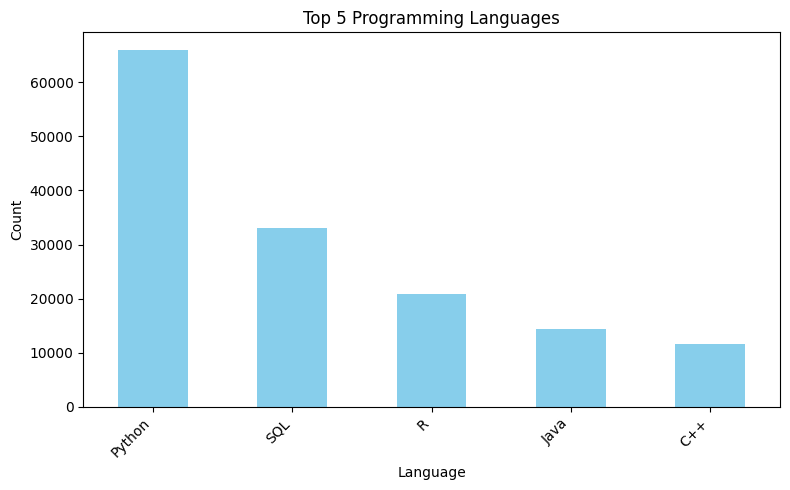

In [32]:
plot_bar(language_counts.head(5), 'Top 5 Programming Languages', 'Language', 'Count')

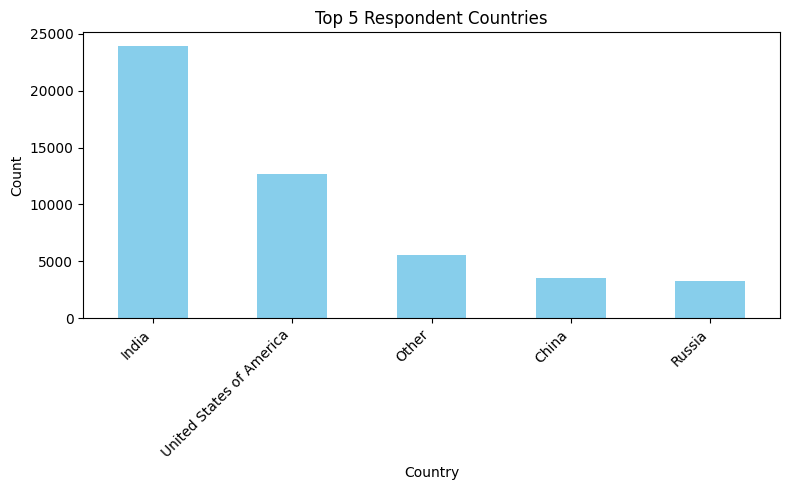

In [33]:
plot_bar(country_counts.head(5), 'Top 5 Respondent Countries', 'Country', 'Count')


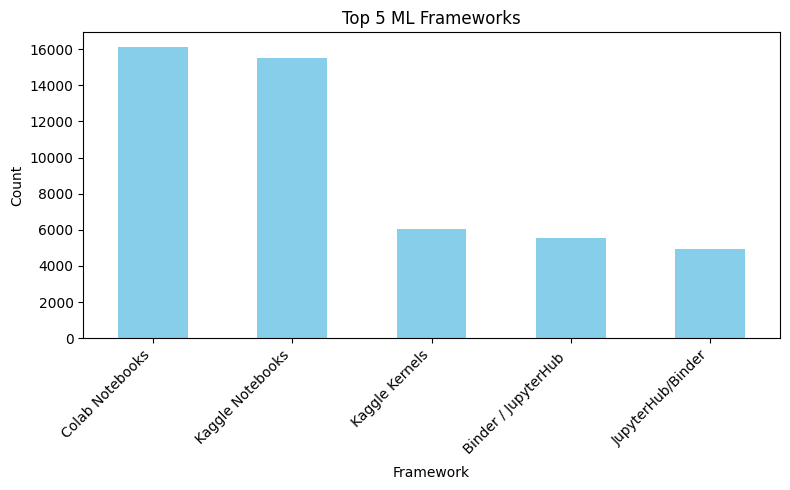

In [34]:
plot_bar(ml_counts.head(5), 'Top 5 ML Frameworks', 'Framework', 'Count')


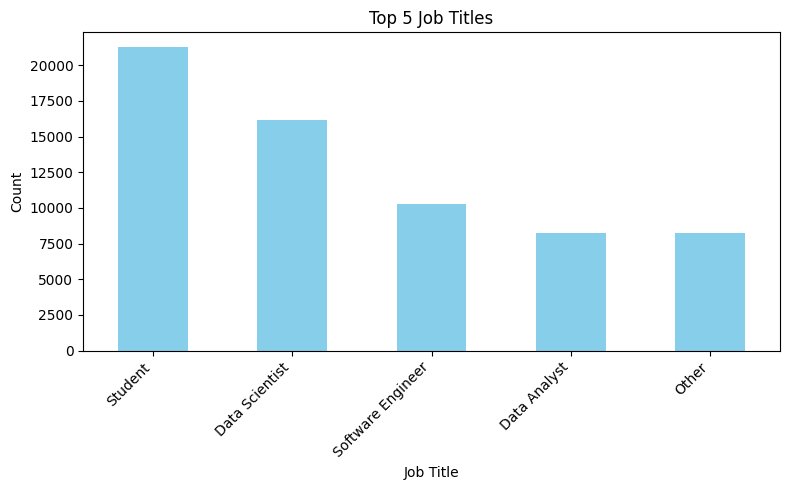

In [35]:
plot_bar(job_counts.head(5), 'Top 5 Job Titles', 'Job Title', 'Count')


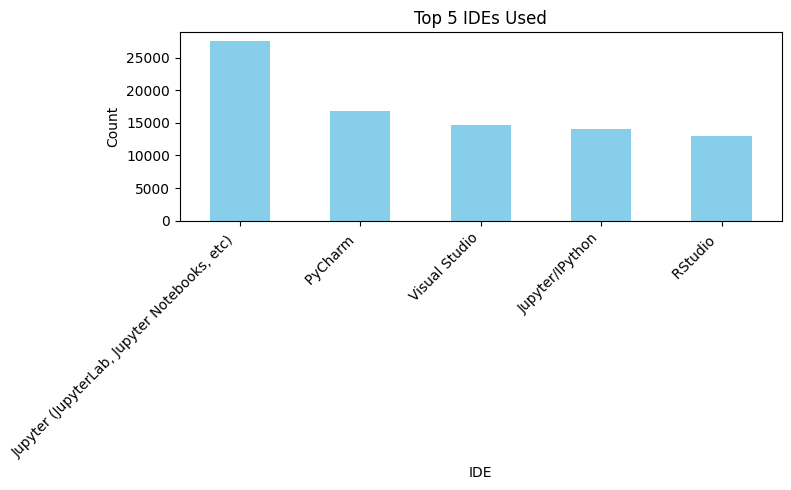

In [36]:
plot_bar(ide_counts.head(5), 'Top 5 IDEs Used', 'IDE', 'Count')


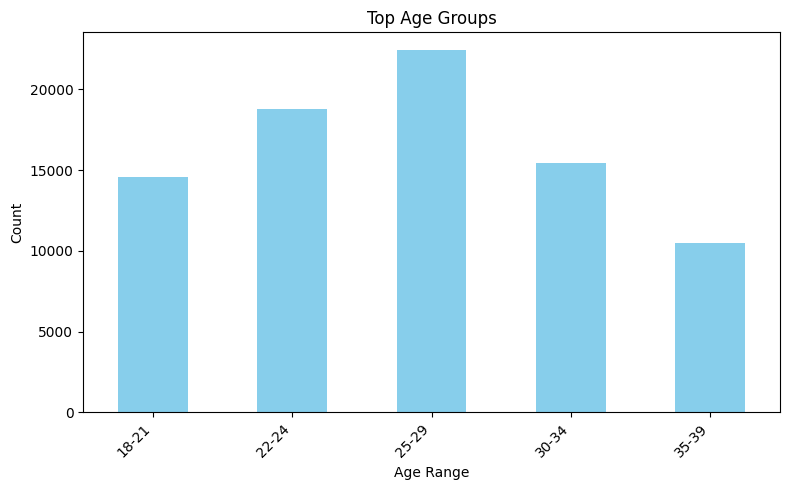

In [37]:
plot_bar(age_counts.head(5), 'Top Age Groups', 'Age Range', 'Count')


## 🧠 Step 5: Interpretation and Summary (Updated)

1. **Programming Language Popularity**  
   Python is the dominant language among respondents, followed by SQL and R. This reflects a strong emphasis on data analysis and statistical computing in the community.

2. **Country Distribution**  
   India leads in respondent count, followed closely by the United States. The presence of “Other” and countries like China and Russia suggests broad international participation.

3. **ML Framework Usage**  
   Colab and Kaggle Notebooks are the most used ML environments, indicating a strong preference for cloud-based, beginner-friendly platforms. Traditional tools like Jupyter/IPythonNB still maintain significant usage.

4. **Job Title Breakdown**  
   Students form the largest respondent group, followed by Data Scientists and Research Engineers. This suggests a mix of academic and professional engagement in the survey population.

5. **IDE Usage**  
   Jupyter-based environments are the most popular IDEs, followed by PyCharm and Visual Studio. This reflects a strong preference for interactive and Python-friendly development tools.

6. **Age Distribution**  
   The majority of respondents are between 25–29 years old, with notable representation from the 22–24 and 30–34 age groups. This suggests a predominantly early-career demographic.

